# 회귀 트리
---

`회귀 트리`란 일반적인 결정 트리와 같이 **트리를 기반으로 하는 회귀 방식 모델**입니다. 

따라서 회귀 트리는 회귀 계수를 기반으로 하는 회귀 함수를 도출하는 것이 아닌 **트리를 이용하는 방식으로 동작하여 회귀 예측**을 진행합니다.

다만 결정 트리의 경우 리프 노드에 속한 특정 클래스의 레이블을 결정하는 반면에 **회귀 트리의 경우 리프 노드에 속하는 데이터의 평균값을 이용해 예측값을 계산**한다는 차이점이 있습니다.

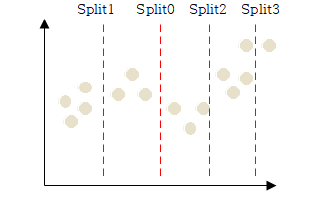

위와 같이 2차 평면도 위에 데이터가 존재한다고 가정할 때 각 Split과 같이 트리 분할이 완료된 상태에서 리프 노드에 해당하는 데이터 값의 평균 값을 최종 리프 노드 값으로 사용하는 것이 바로 회귀 트리의 원리입니다.

# 그 외의 Regressor Class
---

분류 실습에서 사용한 Decision Tree, Gradient Boosting, XGBoost, LightGBM 모델 모두 Regressor 클래스로 회귀 문제에 사용 가능합니다.

실제 예시를 위해 여러 Regressor를 이용해 Boston 주택 가격 예측을 진행하겠습니다.

In [124]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import pandas as pd
import numpy as np

# Bostn 주택가격 데이터 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

# 모델 생성
rf = RandomForestRegressor(n_estimators = 1000)
dt = DecisionTreeRegressor(max_depth = 4)
gb = GradientBoostingRegressor(n_estimators = 1000)
xgb = XGBRegressor(n_estimators = 1000)
lgb = LGBMRegressor(n_estimators = 1000)

def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores=cross_val_score(model, X_data, y_target, scoring = 'neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('####', model.__class__.__name__, '####')
    print('5 fold 교차검증 평균 RMSE :{:.3f}'.format(avg_rmse))

In [125]:
models = [rf, dt, gb, xgb, lgb]

for model in models:
    get_model_cv_prediction(model, X_data, y_target)

#### RandomForestRegressor ####
5 fold 교차검증 평균 RMSE :4.443
#### DecisionTreeRegressor ####
5 fold 교차검증 평균 RMSE :6.070
#### GradientBoostingRegressor ####
5 fold 교차검증 평균 RMSE :4.223
#### XGBRegressor ####
5 fold 교차검증 평균 RMSE :4.251
#### LGBMRegressor ####
5 fold 교차검증 평균 RMSE :4.646


회귀 트리의 Regressor 클래스는 회귀 계수를 이용하지 않기 때문에 coef_ 속성을 사용할 수 없지만 반면 트리 기반 모델이기 때문에 feature_importances_를 이용해 피처 중요도를 확인할 수 있습니다.

<AxesSubplot:>

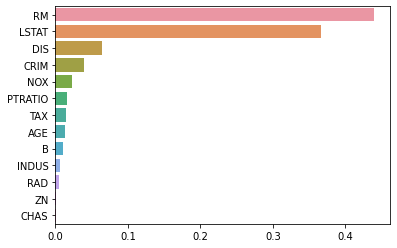

In [126]:
import seaborn as sns

rf.fit(X_data, y_target)

feature_series = pd.Series(data=rf.feature_importances_, index = X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

# 회귀 트리의 예측값 판단 시각화
---

(100, 2)


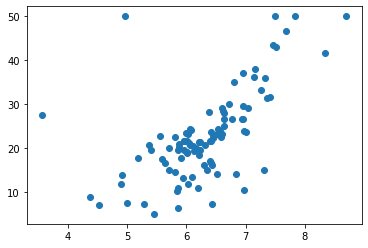

In [127]:
bostonDF_sample = bostonDF[['RM', 'PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100)
print(bostonDF_sample.shape)

plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE)

In [128]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정트리 기반 Regressor 생성
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트 데이터셋을 4.5에서 8.5까지 100개 데이터셋으로 생성
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 데이터에서 시각화를 위해 RM피처만 사용
X_feature = bostonDF_sample['RM'].values.reshape(-1, 1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1, 1)

# 학습 및 예측
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

각 모델을 이용해 예측한 PRICE 회귀선을 시각화합니다.

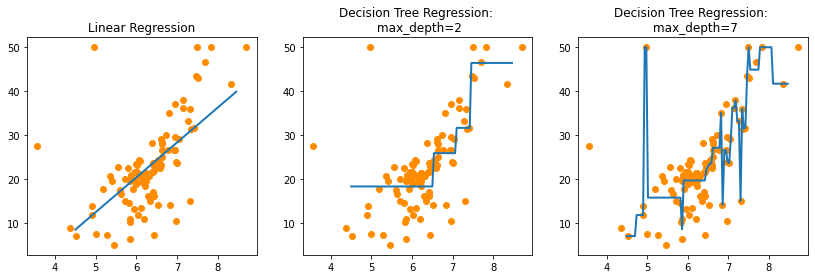

In [137]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols=3)

# X축 값을 4.5 ~ 8.5로 변환하며 입력했을 때 선형 회귀외 결정 트리 회귀 예측선 시각화
# 선형회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

# DT의 max_depth를 2로 했을 때의 회귀 예측선
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax2.plot(X_test, pred_rf2, label='max_depth=2', linewidth=2)

# 선형회귀로 학습된 모델 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax3.plot(X_test, pred_rf7, label='max_depth=7', linewidth=2)

위 시각화 결과처럼 선형회귀는 예측 회귀선을 표현하지만 Tree Regressor의 경우 시각화 결과처럼 **분할되는 노드에 따라 가지를 만들면서 계단 형식의 회귀선이 생성**됩니다. 

트리 기반 모델의 경우 max_depth가 깊을수록 과적합 이슈가 발생하는데 Tree Regressor의 경우도 마찬가지로 max_depth = 7 모델의 회귀선과 같이 과적합 문제가 발생하는 것을 확인할 수 있습니다.